# Kmeans Clustering

In [5]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris  = load_iris()
irisDF = pd.DataFrame(data = iris.data,columns = iris.feature_names)
irisDF.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=1000,random_state=0)
kmeans.fit(irisDF)
print('Cluster : \n',kmeans.labels_);print('='*50)
irisDF['target'] =iris.target
irisDF['cluster'] = kmeans.labels_
print(irisDF.groupby(['target','cluster'])['sepal length (cm)'].count());print('='*50)
print(irisDF.head(3))

Cluster : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
target  cluster
0       0          50
1       1           2
        2          48
2       1          36
        2          14
Name: sepal length (cm), dtype: int64
   sepal length (cm)  sepal width (cm)  ...  target  cluster
0                5.1               3.5  ...       0        0
1                4.9               3.0  ...       0        0
2                4.7               3.2  ...       0        0

[3 rows x 6 columns]


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
irisDF['pc1'] = pca_transformed[:,0]
irisDF['pc2'] = pca_transformed[:,1]
irisDF.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pc1,pc2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949


Text(0.5, 1.0, 'Kmeans-Cluster')

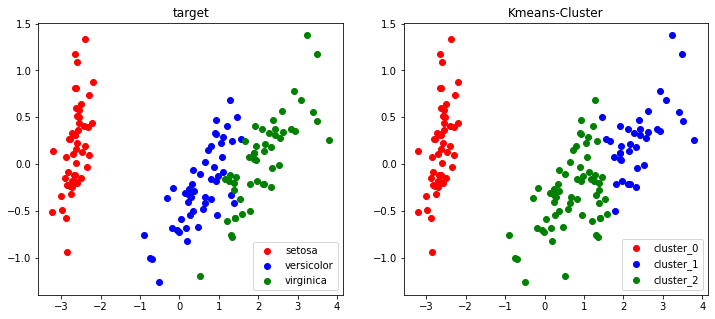

In [22]:
fig, axs = plt.subplots(figsize=(12,5),ncols=2)
colors =['red', 'blue', 'green']
for i, color in enumerate(colors):
    axs[0].scatter(x=irisDF[irisDF['target']==i]['pc1'],y=irisDF[irisDF['target']==i]['pc2'],c=color,label =iris.target_names[i])
axs[0].legend()
axs[0].set_title('target')
for i, color in enumerate(colors):
    axs[1].scatter(x=irisDF[irisDF['cluster']==i]['pc1'],y=irisDF[irisDF['cluster']==i]['pc2'],c=color,label = 'cluster_'+str(i))
axs[1].legend()
axs[1].set_title('Kmeans-Cluster')

# 군집화 알고리즘 테스트를 위한 데이터 생성
- `make_blobs`

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd

# 200 recode / 2 features / 3 centers
X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape, y.shape)
print(np.unique(y,return_counts=True))

DF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
DF['target']=y
DF.head()

(200, 2) (200,)
(array([0, 1, 2]), array([67, 67, 66]))


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [21]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels =kmeans.fit_predict(X)
DF['kmeans_label'] = cluster_labels

Text(0.5, 1.0, 'kmeans clustering')

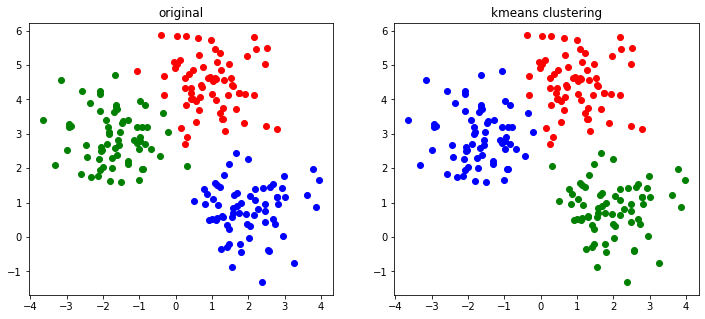

In [25]:
colors =['red', 'blue', 'green']
fig, axs = plt.subplots(figsize=(12,5),ncols=2)
for i , color in enumerate(colors):
    axs[0].scatter(x=DF[DF['target']==i]['ftr1'],y=DF[DF['target']==i]['ftr2'],c=color)
axs[0].set_title('original')
for i , color in enumerate(colors):
    axs[1].scatter(x=DF[DF['kmeans_label']==i]['ftr1'],y=DF[DF['kmeans_label']==i]['ftr2'],c=color)
axs[1].set_title('kmeans clustering')

- make_blobs의 cluster_std 파라미터로 데이터 분포도를 조절한다. 
- cluster_std가 작을 수록 군집중심에 데이터가 모여있고, 클수록 데이터가 퍼져있다.

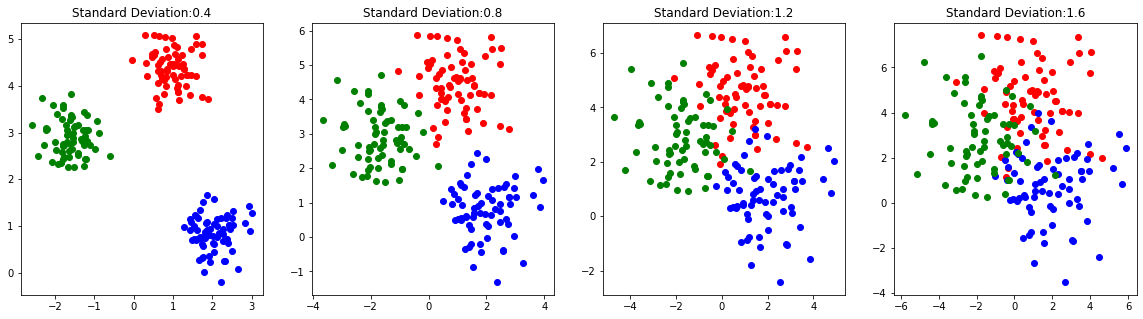

In [29]:

colors =['red', 'blue', 'green']
std_list =[0.4,0.8,1.2,1.6]
fig, axs = plt.subplots(figsize=(20,5),ncols=4)
for j in range(4):
    X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=std_list[j],random_state=0)
    DF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
    DF['target'] = y
    for i , color in enumerate(colors):
        axs[j].scatter(x=DF[DF['target']==i]['ftr1'],y=DF[DF['target']==i]['ftr2'],c=color)
    axs[j].set_title('Standard Deviation:'+str(std_list[j]))
